TEAM MEMBERS:

Hemant Jain 

Neeraj Premani

Sagar Shah

Book: Harry Potter Series

![alt text](http://www.privatejetscharter.com/blog/wp-content/uploads/2015/12/hogwarts-in-the-snow-1024x457.jpg)

In [0]:
import re
from collections import defaultdict


In [0]:
books = ["data/harry1.txt",
         "data/harry2.txt",
         "data/harry3.txt",
         "data/harry4.txt",
         "data/harry5.txt",
         "data/harry6.txt",
         "data/harry7.txt"]

In [5]:
with open(books[0], 'r') as f:
    text = f.read().replace('&rsquo;',"'")
text.replace('\n', ' ')

'Generated by ABC Amber LIT Converter, http://www.processtext.com/abclit.html  Harry Potter & The Sorcerer’s Stone  byJ.K. Rowling  C H A P T E R O N E  THE BOY WHO LIVED  Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody

In [6]:
# Importing Packages
import codecs
import os
import re
import time
import gensim
import pandas as pd
import glob
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
# Books present
books = sorted(glob.glob("data/*.txt"))

books

['data/harry1.txt',
 'data/harry2.txt',
 'data/harry3.txt',
 'data/harry4.txt',
 'data/harry5.txt',
 'data/harry6.txt',
 'data/harry7.txt']

In [8]:
# Read data from all books to single corpus variable
temp = ""
t = ""
chars = []
for book in books:
    print() 
    print ("Reading " + str(book))
    with codecs.open(book, "rb", "utf-8") as infile:
        temp += infile.read()
        chars.append(len(temp))
        print ("Characters read so far " + str(len(temp)))


Reading data/harry1.txt
Characters read so far 452403

Reading data/harry2.txt
Characters read so far 958746

Reading data/harry3.txt
Characters read so far 1602775

Reading data/harry4.txt
Characters read so far 2732465

Reading data/harry5.txt
Characters read so far 4277047

Reading data/harry6.txt
Characters read so far 5317594

Reading data/harry7.txt
Characters read so far 6489478


In [9]:
lens = []
lens.append(chars[0])
for i in range(1, len(chars)):
    lens.append(chars[i] - chars[i-1])
lens


[452403, 506343, 644029, 1129690, 1544582, 1040547, 1171884]

<BarContainer object of 7 artists>

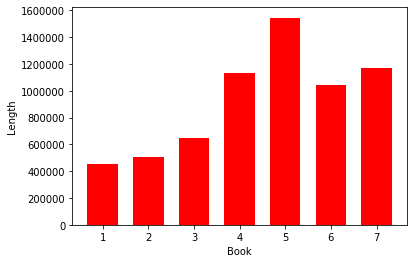

In [10]:
y = lens
N = len(y)
x = [i+1 for i in range(N)]
width = 1/1.5

pylab.xlabel("Book")
pylab.ylabel("Length")
plt.bar(x, y, width, color="red", align='center')

In [11]:
# Split into sentences
import nltk
nltk.download('punkt')
sentences = nltk.tokenize.sent_tokenize(temp)
print ("Total Sentences are " + str(len(sentences)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Total Sentences are 79695


In [12]:
# sentences to list of words
sent_words = []
total_tokens = 0
for raw_sent in sentences:
    clean = nltk.word_tokenize(re.sub("[^a-zA-Z]"," ", raw_sent.strip().lower()))
    tokens = [i for i in clean if len(i) > 1]
    total_tokens += len(tokens)
    sent_words.append(tokens)

print ("Total tokens are " + str(total_tokens))

Total tokens are 1098020


In [13]:
# capture collocations
bigram = gensim.models.Phrases(sent_words)
final = []
for s in sent_words:
    processed_sent = bigram[s]
    final.append(processed_sent)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [14]:
# Sample first two sentences
final[:2]

[['generated_by',
  'abc_amber',
  'lit_converter',
  'http_www',
  'processtext_com',
  'abclit_html',
  'harry',
  'potter',
  'the',
  'sorcerer_stone',
  'byj'],
 ['rowling',
  'the',
  'boy',
  'who_lived',
  'mr',
  'and',
  'mrs_dursley',
  'of',
  'number_four',
  'privet_drive',
  'were',
  'proud',
  'to',
  'say',
  'that',
  'they',
  'were',
  'perfectly',
  'normal',
  'thank_you',
  'very_much']]

Model Parameters

In [0]:
num_features = 300
min_word_count = 3
num_workers = 3
context_size = 7
seed = 1

In [0]:
model = gensim.models.Word2Vec(sent_words, window=context_size, \
                               min_count=min_word_count, workers=num_workers, \
                               seed=seed, size=num_features
                              )

In [17]:
model.train(sentences=sentences, total_examples=model.corpus_count, total_words=model.corpus_count, epochs=200)
#model.train(sent_words)

(0, 1280809800)

In [18]:
print ('Vocabulary ' + str(len(model.wv.vocab)))

Vocabulary 12002


In [19]:
if not os.path.exists("model"):
    os.makedirs("model")
model.save(os.path.join("model", "harry2vec.w2v"))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [20]:
# words 
print ('Similar kind of words for AZKABAN: ')
print ([i[0] for i in model.wv.most_similar('azkaban')])
print ('\n')
print ('Similar kind of words for SNAPE: ')
print ([i[0] for i in model.wv.most_similar('snape')])

Similar kind of words for AZKABAN: 
['potions', 'information', 'gringotts', 'tournament', 'mission', 'lure', 'power', 'triwizard', 'lessons', 'secret']


Similar kind of words for SNAPE: 
['dumbledore', 'slughorn', 'moody', 'lupin', 'umbridge', 'sirius', 'quirrell', 'lockhart', 'riddle', 'mcgonagall']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [21]:
start = time.time()
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.syn0
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)
stop = time.time() - start
print ('Time taken is ' + str(stop))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Time taken is 212.6511082649231


In [22]:
!pip install gensim

In [23]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)
points.head(20)

,word,x,y
0,generated,-59.895744,-16.440760
1,by,-48.903202,-31.947348
2,abc,-60.970314,-34.904167
3,amber,-60.985516,-34.942341
4,lit,-60.989449,-34.954468
5,converter,-60.996616,-34.960388
6,http,-60.994179,-34.948105
7,www,-64.299889,-10.377903
8,processtext,-64.270248,-10.253829
9,com,-64.235268,-10.120369


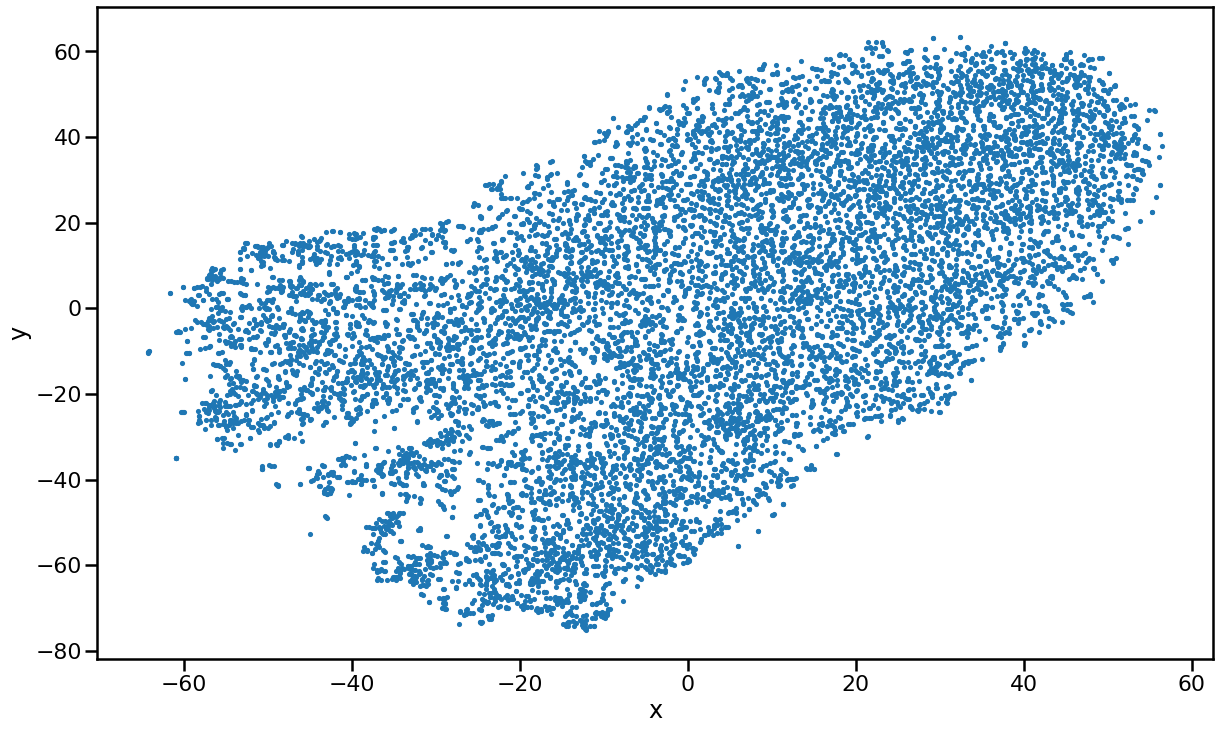

In [24]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [0]:
import string
import io

In [0]:
class Book():
  # open and read file when initializing book object
  # create empty lists for BoWs, must reset to zero/empty when calling method
  def __init__(self, file):
    self.book = io.open(file, 'rb').readlines()
    #self.book = io.open(file, 'rb', encoding='utf-8', newline='\n').readlines()
    self.BoW, self.BoWnSW = [], []
    self.wordCount = []
    self.periodCount, self.questionCount, self.exclamationCount = 0, 0, 0
    
    #make BoW
    for line in self.book:    
      lineStripped= line.rstrip() 
      # Research: https://stackoverflow.com/questions/8152820/how-to-do-string-formatting-with-unicode-emdash
      #linedStrippedDashRemoved = lineStripped.replace(u"\u2014", ' ') 
      #lineNormalizedLowered = unicodedata.normalize('NFKD', linedStrippedDashRemoved).encode('ascii','ignore').lower().strip()
      #lineNoPunc = lineNormalizedLowered.translate(None, string.punctuation).split()
      for word in lineStripped:
        self.BoW.append(word)
        
    stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'either', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except','few', 'fill', 'find', 'for', 'former', 'formerly', 'found', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'namely', 'neither', 'never', 'nevertheless', 'next', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise','our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'since', 'sincere', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'this', 'those', 'though', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves']      
  
    #make BoW with no stopwords
    for line in self.book:    
      lineStripped= line.rstrip() 
      # Research: https://stackoverflow.com/questions/8152820/how-to-do-string-formatting-with-unicode-emdash
      #linedStrippedDashRemoved = lineStripped.replace(u"\u2014", ' ') 
      #lineNormalizedLowered = unicodedata.normalize('NFKD', linedStrippedDashRemoved).encode('ascii','ignore').lower().strip()
      #lineNoPunc = lineNormalizedLowered.translate(None, string.punctuation).split()
      for word in lineStripped:
        if word not in stopwords:
            self.BoWnSW.append(word)

    #punctuation analysis
    punctBoW = []
    for line in self.book:    
      lineStripped= line.rstrip() 
      # Research: https://stackoverflow.com/questions/8152820/how-to-do-string-formatting-with-unicode-emdash
      #linedStrippedDashRemoved = lineStripped.replace(u"\u2014", ' ') 
      #lineNormalizedLowered = unicodedata.normalize('NFKD',linedStrippedDashRemoved).encode('ascii','ignore').lower().strip().split()
      for each in lineStripped:
        punctBoW.append(each)

    wordCounter = 0
    self.periodLIST, self.questionLIST, self.exclamationLIST = [], [], []

    for word in punctBoW:
      wordCounter += 1
      for char in range(word):
        if char == ".":
          if word[-4:] == "mr." or word[-4:] == "mrs.":
            continue
          elif word[-3:] == "...":
            continue
          elif word[-1:] == '"':
            wordCounter = 0
          else:
            self.periodCount += 1
            self.periodLIST.append(wordCounter)
            wordCounter = 0
        elif char == "?":
          self.questionCount += 1
          self.questionLIST.append(wordCounter)
          wordCounter = 0
        elif char == "!":
          self.exclamationCount += 1
          self.exclamationLIST.append(wordCounter)
          wordCounter = 0
        else:
          continue
  
                               
  # copy dictionary into a list and sort by descending values
  def copyDictSortDes(self, DictToCopy, length = None):
    if length is None:
      length = len(DictToCopy) 
    copy, listToReturn = [], []
    for x, y in DictToCopy.items():
       copy.append((y,x))
    copy = sorted(copy, reverse = True)
    for x in copy[0:length]:
      listToReturn.append((x[1], x[0]))
    return listToReturn 
  
  # sort single words by frequency
  def getWordCount(self, listToCount = None):
    if listToCount is None:
      if not self.BoWnSW:
        listToCount = self.BoW
      else:
        listToCount = self.BoWnSW
    wordCount={}
    for word in listToCount:
      if word not in wordCount:
        wordCount[word] = 1
      else:
        wordCount[word] += 1
    self.wordCount = self.copyDictSortDes(wordCount)
    
  # generate ngrams from one word to 6 words
  def getNgram(self, n): 
    nGram_list = []
    if n == 1:
      unigram = self.getWordCount(self.BoW)
      return self.wordCount
    elif n == 2:
      nGram_list = zip(self.BoW, self.BoW[1:])
    elif n == 3:
      nGram_list = zip(self.BoW, self.BoW[1:], self.BoW[2:])
    elif n == 4:
      nGram_list = zip(self.BoW, self.BoW[1:], self.BoW[2:], self.BoW[3:])
    elif n == 5:
      nGram_list = zip(self.BoW, self.BoW[1:], self.BoW[2:], self.BoW[3:], self.BoW[4:])
    elif n == 6:
      nGram_list = zip(self.BoW, self.BoW[1:], self.BoW[2:], self.BoW[3:], self.BoW[4:], self.BoW[5:])
    else:
      print ("Error: Please enter an n-value from 1 - 6.")
      
    nGram_dict = {}
    for nGram in nGram_list:
      if nGram in nGram_dict:
        nGram_dict[nGram] += 1
      else:
        nGram_dict[nGram] = 1
    nGram = self.copyDictSortDes(nGram_dict, 50)
    return nGram
  
  
  # returns number of positive and negative words in book and lists out those words
  def sentiment(self, pos_List, neg_List):
    posCount, negCount = 0, 0
    posWordsInBook, negWordsInBook = {}, {}
    
    listToIterate = []
    if not self.BoWnSW:
        listToIterate = self.BoW
    else:
        listToIterate = self.BoWnSW

    for word in listToIterate:
      if word in pos_List:
        posCount += 1
        if word not in posWordsInBook:
          posWordsInBook[word] = 1
        else:
          posWordsInBook[word] += 1
      elif word in neg_List:
        negCount += 1
        if word not in negWordsInBook:
          negWordsInBook[word] = 1
        else:
          negWordsInBook[word] += 1
      else:
        continue

    print ("Positive word count is:", posCount)
    print ("Negative word count is:", negCount)
    print ("The top 30 occuring positive words are: ")
    print (self.copyDictSortDes(posWordsInBook, 30))
    print ("The top 30 occuring negative words are: ")
    print (self.copyDictSortDes(negWordsInBook, 30))

In [0]:
hp1 = Book("data/harry1.txt")
hp2 = Book("data/harry2.txt")
hp3 = Book("data/harry3.txt")
hp4 = Book("data/harry4.txt")
hp5 = Book("data/harry5.txt")
hp6 = Book("data/harry6.txt")
hp7 = Book("data/harry7.txt")


How many total words in each book?

In [28]:
print ("HP 1: ", len(hp1.BoW))
print ("HP 2: ", len(hp2.BoW))
print ("HP 3: ", len(hp3.BoW))
print ("HP 4: ", len(hp4.BoW))
print ("HP 5: ", len(hp5.BoW))
print ("HP 6: ", len(hp6.BoW))
print ("HP 7: ", len(hp7.BoW))

HP 1:  463709
HP 2:  519091
HP 3:  661947
HP 4:  1117252
HP 5:  1526643
HP 6:  1022512
HP 7:  1180614


How many unique words in each book? (each word only counted once)

In [29]:
hp1.getWordCount()
print ("HP 1: ", len(hp1.wordCount))
hp2.getWordCount()
print ("HP 2: ", len(hp2.wordCount))
hp3.getWordCount()
print ("HP 3: ", len(hp3.wordCount))
hp4.getWordCount()
print ("HP 4: ", len(hp4.wordCount))
hp5.getWordCount()
print ("HP 5: ", len(hp5.wordCount))
hp6.getWordCount()
print ("HP 6: ", len(hp6.wordCount))
hp7.getWordCount()
print ("HP 7: ", len(hp7.wordCount))

HP 1:  88
HP 2:  88
HP 3:  85
HP 4:  85
HP 5:  91
HP 6:  100
HP 7:  92


Display the Bar Plot for each Book 

In [30]:
from IPython.display import display, HTML, Image
#displayHTML(
display(HTML("""
<html>
<head>
    
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">   
  
    google.charts.load('current', {packages: ['corechart', 'bar']});
    google.charts.setOnLoadCallback(drawColColors);
    
    function drawColColors() {
      var data = new google.visualization.DataTable();
      data.addColumn('string', 'HP Book');
      data.addColumn('number', 'Total Words');
      data.addColumn('number', 'Unique Words');

      data.addRows([
        ['HP1', 77744, 5687],
        ['HP2', 85551, 6830],
        ['HP3', 107671, 7433],
        ['HP4', 191667, 10166],
        ['HP5', 256982, 12624],
        ['HP6', 169309, 10528],
        ['HP7', 197697, 11387],       
      ]);  

      var options = {
        colors: ['#add8e6', '#e6bbad'],
      };

      var chart = new google.visualization.ColumnChart(document.getElementById('chart_div'));
      chart.draw(data, options);
    }
    
    </script>
</head>

 <body>
  <div id="chart_div" style="width: 900px; height: 500px;"></div>
 </body>
</html>
"""))

Bar Plot Graphical

In [31]:
display(HTML("""
<html>
<head>
    
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">   
  
    google.charts.load('current', {packages: ['corechart', 'bar']});
    google.charts.setOnLoadCallback(drawColColors);
    
    function drawColColors() {
      var data = new google.visualization.DataTable();
      data.addColumn('string', 'HP Book');
      data.addColumn('number', 'Period Marks');
      data.addColumn('number', 'Question Marks');
       data.addColumn('number', 'Exclamation Marks');

      data.addRows([
        ['HP1', 5190, 759, 478],
        ['HP2', 5307, 713, 553],
        ['HP3', 6647, 1063, 1039],
        ['HP4', 10756, 1820, 1392],
        ['HP5', 13596, 2609, 1562],
        ['HP6', 8962, 1744, 1057],
        ['HP7', 10831, 2125, 1546],
        
      ]);

      var options = {
        colors: ['#009d00', '#8000ff', '#ffa500'],
      };

      var chart = new google.visualization.ColumnChart(document.getElementById('chart_div'));
      chart.draw(data, options);
    }
    
    </script>
</head>

 <body>
  <div id="chart_div" style="width: 900px; height: 500px;"></div>
 </body>
</html>
"""))

In [32]:
display(HTML("""
<html>
<head>
    
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">   
  
    google.charts.load('current', {packages: ['corechart', 'bar']});
    google.charts.setOnLoadCallback(drawColColors);
    
    function drawColColors() {
      var data = new google.visualization.DataTable();
      data.addColumn('string', 'HP Book');
      data.addColumn('number', 'Declarative or Imperative Sentences');
      data.addColumn('number', 'Interrogative Sentences');
       data.addColumn('number', 'Exclamatory Sentences');

      data.addRows([
        ['HP1', 13, 8, 7],
        ['HP2', 14, 8, 8],
        ['HP3', 13, 8, 7],
        ['HP4', 15, 9, 8],
        ['HP5', 15, 9, 10],
        ['HP6', 15, 9, 10],
        ['HP7', 15, 9, 9],   
      ]);
      
      var options = {
        colors:  ['#009d00', '#8000ff', '#ffa500'],
          vAxis: {
          title: 'Words in Sentence'
        }
      };

      var chart = new google.visualization.ColumnChart(document.getElementById('chart_div'));
      chart.draw(data, options);
    }
    
    </script>
</head>

 <body>
  <div id="chart_div" style="width: 900px; height: 500px;"></div>
 </body>
</html>
"""))


Ngrams

What are the top 50 most common Ngrams from bigrams to sixgrams for each book?

In [33]:
hp1.getNgram(2)

[((101, 32), 11964),
 ((32, 116), 10141),
 ((226, 128), 9128),
 ((104, 101), 8831),
 ((100, 32), 8790),
 ((116, 104), 7981),
 ((116, 32), 7526),
 ((32, 97), 6769),
 ((115, 32), 6291),
 ((105, 110), 6154),
 ((101, 114), 5909),
 ((32, 104), 5635),
 ((32, 115), 5363),
 ((44, 32), 4942),
 ((32, 119), 4735),
 ((121, 32), 4211),
 ((101, 100), 4204),
 ((97, 110), 4042),
 ((111, 117), 3968),
 ((114, 101), 3960),
 ((110, 32), 3943),
 ((111, 110), 3804),
 ((97, 114), 3743),
 ((32, 111), 3658),
 ((110, 103), 3527),
 ((110, 100), 3526),
 ((32, 98), 3391),
 ((114, 32), 3203),
 ((128, 153), 3117),
 ((104, 97), 3097),
 ((116, 111), 3020),
 ((104, 105), 2973),
 ((97, 116), 2970),
 ((111, 32), 2953),
 ((108, 101), 2872),
 ((46, 32), 2864),
 ((97, 115), 2784),
 ((32, 105), 2778),
 ((115, 116), 2719),
 ((111, 114), 2635),
 ((116, 101), 2610),
 ((103, 32), 2601),
 ((101, 110), 2540),
 ((32, 102), 2435),
 ((128, 156), 2434),
 ((128, 157), 2410),
 ((105, 116), 2385),
 ((108, 108), 2371),
 ((118, 101), 2351)

In [34]:
hp1.getNgram(3)

[((32, 116, 104), 6247),
 ((116, 104, 101), 5224),
 ((104, 101, 32), 4637),
 ((101, 100, 32), 3160),
 ((226, 128, 153), 3117),
 ((105, 110, 103), 3031),
 ((110, 103, 32), 2515),
 ((110, 100, 32), 2444),
 ((226, 128, 156), 2434),
 ((226, 128, 157), 2410),
 ((32, 116, 111), 2320),
 ((32, 97, 110), 2246),
 ((97, 110, 100), 2227),
 ((116, 111, 32), 2023),
 ((32, 119, 97), 1826),
 ((32, 104, 101), 1797),
 ((46, 226, 128), 1726),
 ((101, 114, 32), 1714),
 ((97, 115, 32), 1642),
 ((97, 116, 32), 1636),
 ((32, 226, 128), 1628),
 ((32, 104, 97), 1541),
 ((32, 104, 105), 1513),
 ((100, 32, 116), 1484),
 ((32, 97, 32), 1482),
 ((32, 111, 102), 1426),
 ((114, 114, 121), 1419),
 ((97, 114, 114), 1408),
 ((32, 72, 97), 1379),
 ((72, 97, 114), 1330),
 ((32, 105, 110), 1326),
 ((114, 101, 32), 1324),
 ((114, 121, 32), 1296),
 ((104, 101, 114), 1270),
 ((119, 97, 115), 1266),
 ((101, 32, 116), 1252),
 ((105, 115, 32), 1239),
 ((104, 105, 115), 1224),
 ((101, 114, 101), 1221),
 ((116, 32, 116), 1207),
 

In [35]:
hp1.getNgram(4)

[((32, 116, 104, 101), 4597),
 ((116, 104, 101, 32), 3163),
 ((105, 110, 103, 32), 2343),
 ((97, 110, 100, 32), 1826),
 ((32, 116, 111, 32), 1730),
 ((32, 97, 110, 100), 1726),
 ((97, 114, 114, 121), 1342),
 ((72, 97, 114, 114), 1326),
 ((32, 119, 97, 115), 1224),
 ((32, 111, 102, 32), 1171),
 ((226, 128, 157, 32), 1148),
 ((110, 226, 128, 153), 1137),
 ((119, 97, 115, 32), 1100),
 ((104, 105, 115, 32), 1049),
 ((32, 72, 97, 114), 1034),
 ((226, 128, 153, 115), 1006),
 ((46, 226, 128, 156), 996),
 ((32, 121, 111, 117), 975),
 ((128, 153, 115, 32), 940),
 ((114, 114, 121, 32), 940),
 ((32, 104, 101, 32), 938),
 ((32, 104, 105, 115), 884),
 ((104, 97, 116, 32), 861),
 ((32, 105, 110, 32), 858),
 ((100, 32, 116, 104), 846),
 ((226, 128, 153, 116), 838),
 ((32, 226, 128, 148), 814),
 ((115, 97, 105, 100), 793),
 ((32, 115, 97, 105), 793),
 ((128, 153, 116, 32), 764),
 ((116, 32, 116, 104), 755),
 ((110, 32, 116, 104), 753),
 ((32, 226, 128, 156), 746),
 ((32, 104, 97, 100), 729),
 ((32, 11

In [36]:
hp1.getNgram(5)

[((32, 116, 104, 101, 32), 3070),
 ((32, 97, 110, 100, 32), 1625),
 ((72, 97, 114, 114, 121), 1326),
 ((32, 119, 97, 115, 32), 1061),
 ((32, 72, 97, 114, 114), 1031),
 ((226, 128, 153, 115, 32), 940),
 ((97, 114, 114, 121, 32), 907),
 ((110, 226, 128, 153, 116), 836),
 ((32, 104, 105, 115, 32), 826),
 ((32, 115, 97, 105, 100), 789),
 ((226, 128, 153, 116, 32), 764),
 ((44, 226, 128, 157, 32), 688),
 ((100, 32, 116, 104, 101), 666),
 ((110, 32, 116, 104, 101), 665),
 ((32, 226, 128, 148, 32), 657),
 ((115, 97, 105, 100, 32), 656),
 ((32, 104, 97, 100, 32), 640),
 ((226, 128, 157, 32, 115), 634),
 ((32, 116, 104, 97, 116), 619),
 ((226, 128, 157, 226, 128), 586),
 ((128, 157, 226, 128, 156), 581),
 ((157, 32, 115, 97, 105), 556),
 ((128, 157, 32, 115, 97), 556),
 ((116, 32, 116, 104, 101), 553),
 ((32, 121, 111, 117, 32), 542),
 ((105, 110, 103, 32, 116), 524),
 ((46, 32, 226, 128, 156), 515),
 ((116, 104, 97, 116, 32), 499),
 ((32, 116, 104, 101, 121), 486),
 ((102, 32, 116, 104, 101), 

In [37]:
hp1.getNgram(6)

[((32, 72, 97, 114, 114, 121), 1031),
 ((72, 97, 114, 114, 121, 32), 901),
 ((110, 226, 128, 153, 116, 32), 764),
 ((32, 115, 97, 105, 100, 32), 653),
 ((226, 128, 157, 226, 128, 156), 581),
 ((226, 128, 157, 32, 115, 97), 556),
 ((157, 32, 115, 97, 105, 100), 556),
 ((128, 157, 32, 115, 97, 105), 556),
 ((110, 32, 116, 104, 101, 32), 543),
 ((32, 116, 104, 97, 116, 32), 485),
 ((44, 226, 128, 157, 32, 115), 448),
 ((100, 32, 116, 104, 101, 32), 421),
 ((100, 110, 226, 128, 153, 116), 418),
 ((32, 116, 104, 101, 121, 32), 385),
 ((32, 111, 102, 32, 116, 104), 381),
 ((101, 32, 119, 97, 115, 32), 376),
 ((44, 32, 97, 110, 100, 32), 374),
 ((72, 97, 103, 114, 105, 100), 370),
 ((111, 102, 32, 116, 104, 101), 364),
 ((32, 119, 105, 116, 104, 32), 361),
 ((116, 32, 116, 104, 101, 32), 355),
 ((102, 32, 116, 104, 101, 32), 308),
 ((101, 100, 32, 116, 111, 32), 307),
 ((32, 116, 104, 101, 32, 115), 299),
 ((32, 105, 110, 32, 116, 104), 298),
 ((32, 72, 97, 103, 114, 105), 298),
 ((116, 111, 

In [38]:
hp2.getNgram(2)

[((101, 32), 12537),
 ((32, 116), 10603),
 ((226, 128), 10156),
 ((100, 32), 9873),
 ((104, 101), 9350),
 ((116, 104), 8569),
 ((105, 110), 7677),
 ((116, 32), 7587),
 ((32, 97), 7380),
 ((115, 32), 7076),
 ((32, 115), 6515),
 ((101, 114), 6400),
 ((32, 104), 6106),
 ((44, 32), 5668),
 ((32, 119), 5175),
 ((121, 32), 4999),
 ((101, 100), 4958),
 ((97, 114), 4832),
 ((110, 103), 4611),
 ((97, 110), 4507),
 ((111, 117), 4264),
 ((110, 32), 4252),
 ((114, 101), 4163),
 ((111, 110), 4151),
 ((32, 111), 3995),
 ((110, 100), 3890),
 ((104, 97), 3577),
 ((32, 98), 3569),
 ((114, 32), 3555),
 ((103, 32), 3425),
 ((116, 111), 3324),
 ((97, 116), 3306),
 ((104, 105), 3301),
 ((111, 32), 3262),
 ((97, 115), 3223),
 ((115, 116), 3089),
 ((46, 32), 3087),
 ((108, 101), 3044),
 ((32, 105), 2982),
 ((101, 110), 2974),
 ((128, 156), 2930),
 ((128, 153), 2928),
 ((116, 101), 2924),
 ((128, 157), 2899),
 ((111, 114), 2844),
 ((101, 97), 2788),
 ((32, 102), 2739),
 ((105, 116), 2638),
 ((119, 97), 2532),

In [39]:
hp2.getNgram(3)

[((32, 116, 104), 6637),
 ((116, 104, 101), 5512),
 ((104, 101, 32), 5039),
 ((105, 110, 103), 3945),
 ((101, 100, 32), 3642),
 ((110, 103, 32), 3354),
 ((226, 128, 156), 2930),
 ((226, 128, 153), 2928),
 ((226, 128, 157), 2899),
 ((110, 100, 32), 2726),
 ((97, 110, 100), 2486),
 ((32, 116, 111), 2474),
 ((32, 97, 110), 2423),
 ((116, 111, 32), 2279),
 ((32, 226, 128), 2049),
 ((32, 119, 97), 1974),
 ((32, 104, 101), 1893),
 ((101, 114, 32), 1857),
 ((97, 115, 32), 1798),
 ((32, 104, 105), 1788),
 ((32, 111, 102), 1778),
 ((97, 114, 114), 1756),
 ((114, 114, 121), 1750),
 ((46, 226, 128), 1710),
 ((97, 116, 32), 1688),
 ((72, 97, 114), 1656),
 ((128, 157, 32), 1618),
 ((32, 104, 97), 1604),
 ((32, 97, 32), 1602),
 ((100, 32, 116), 1588),
 ((111, 102, 32), 1527),
 ((32, 115, 97), 1518),
 ((105, 115, 32), 1496),
 ((32, 72, 97), 1495),
 ((32, 105, 110), 1475),
 ((114, 121, 32), 1454),
 ((104, 105, 115), 1446),
 ((104, 101, 114), 1354),
 ((119, 97, 115), 1343),
 ((114, 101, 32), 1340),
 ((

In [40]:
hp2.getNgram(4)

[((32, 116, 104, 101), 4878),
 ((116, 104, 101, 32), 3564),
 ((105, 110, 103, 32), 3116),
 ((97, 110, 100, 32), 2033),
 ((32, 97, 110, 100), 1919),
 ((32, 116, 111, 32), 1883),
 ((97, 114, 114, 121), 1677),
 ((72, 97, 114, 114), 1652),
 ((226, 128, 157, 32), 1618),
 ((32, 111, 102, 32), 1487),
 ((32, 119, 97, 115), 1299),
 ((32, 72, 97, 114), 1286),
 ((104, 105, 115, 32), 1257),
 ((115, 97, 105, 100), 1216),
 ((32, 115, 97, 105), 1201),
 ((119, 97, 115, 32), 1197),
 ((226, 128, 153, 115), 1195),
 ((46, 226, 128, 156), 1165),
 ((128, 153, 115, 32), 1132),
 ((32, 104, 105, 115), 1123),
 ((114, 114, 121, 32), 1112),
 ((32, 226, 128, 156), 1080),
 ((97, 105, 100, 32), 1051),
 ((128, 157, 32, 115), 993),
 ((44, 226, 128, 157), 979),
 ((32, 121, 111, 117), 969),
 ((32, 104, 101, 32), 921),
 ((32, 226, 128, 148), 909),
 ((157, 32, 115, 97), 901),
 ((100, 32, 116, 104), 898),
 ((32, 105, 110, 32), 890),
 ((104, 97, 116, 32), 881),
 ((110, 226, 128, 153), 860),
 ((46, 32, 226, 128), 828),
 ((11

In [41]:
hp2.getNgram(5)

[((32, 116, 104, 101, 32), 3459),
 ((32, 97, 110, 100, 32), 1792),
 ((72, 97, 114, 114, 121), 1652),
 ((32, 72, 97, 114, 114), 1284),
 ((32, 115, 97, 105, 100), 1200),
 ((32, 119, 97, 115, 32), 1159),
 ((226, 128, 153, 115, 32), 1132),
 ((97, 114, 114, 121, 32), 1073),
 ((115, 97, 105, 100, 32), 1041),
 ((32, 104, 105, 115, 32), 1028),
 ((226, 128, 157, 32, 115), 993),
 ((44, 226, 128, 157, 32), 965),
 ((128, 157, 32, 115, 97), 901),
 ((157, 32, 115, 97, 105), 900),
 ((46, 32, 226, 128, 156), 824),
 ((100, 32, 116, 104, 101), 719),
 ((110, 226, 128, 153, 116), 710),
 ((226, 128, 153, 116, 32), 669),
 ((110, 32, 116, 104, 101), 665),
 ((32, 104, 97, 100, 32), 611),
 ((32, 116, 104, 97, 116), 608),
 ((116, 32, 116, 104, 101), 600),
 ((105, 110, 103, 32, 116), 580),
 ((116, 104, 97, 116, 32), 556),
 ((32, 121, 111, 117, 32), 556),
 ((226, 128, 157, 226, 128), 555),
 ((128, 157, 226, 128, 156), 554),
 ((32, 226, 128, 148, 32), 525),
 ((32, 119, 105, 116, 104), 510),
 ((44, 32, 97, 110, 100

In [42]:
hp2.getNgram(6)

[((32, 72, 97, 114, 114, 121), 1284),
 ((72, 97, 114, 114, 121, 32), 1066),
 ((32, 115, 97, 105, 100, 32), 1028),
 ((226, 128, 157, 32, 115, 97), 901),
 ((157, 32, 115, 97, 105, 100), 900),
 ((128, 157, 32, 115, 97, 105), 900),
 ((44, 226, 128, 157, 32, 115), 682),
 ((110, 226, 128, 153, 116, 32), 669),
 ((226, 128, 157, 226, 128, 156), 554),
 ((110, 32, 116, 104, 101, 32), 543),
 ((32, 116, 104, 97, 116, 32), 520),
 ((44, 32, 97, 110, 100, 32), 476),
 ((100, 32, 116, 104, 101, 32), 464),
 ((32, 119, 105, 116, 104, 32), 440),
 ((32, 111, 102, 32, 116, 104), 432),
 ((116, 32, 116, 104, 101, 32), 429),
 ((111, 102, 32, 116, 104, 101), 404),
 ((32, 116, 104, 101, 32, 115), 404),
 ((116, 111, 32, 116, 104, 101), 378),
 ((101, 32, 119, 97, 115, 32), 371),
 ((102, 32, 116, 104, 101, 32), 370),
 ((100, 32, 72, 97, 114, 114), 354),
 ((116, 226, 128, 153, 115, 32), 346),
 ((226, 128, 148, 226, 128, 157), 345),
 ((101, 100, 32, 116, 111, 32), 345),
 ((32, 226, 128, 148, 226, 128), 336),
 ((111, 

In [43]:
hp3.getNgram(2) 
#similarly do it for same....

[((101, 32), 16042),
 ((226, 128), 13766),
 ((32, 116), 13610),
 ((100, 32), 12266),
 ((104, 101), 11920),
 ((116, 104), 10718),
 ((105, 110), 9631),
 ((116, 32), 9482),
 ((115, 32), 9189),
 ((32, 97), 9157),
 ((101, 114), 8436),
 ((32, 104), 7896),
 ((128, 153), 7831),
 ((32, 115), 7608),
 ((44, 32), 7235),
 ((32, 119), 6458),
 ((101, 100), 6206),
 ((121, 32), 5846),
 ((97, 110), 5709),
 ((114, 101), 5613),
 ((97, 114), 5584),
 ((111, 110), 5553),
 ((110, 32), 5506),
 ((110, 103), 5300),
 ((111, 117), 5260),
 ((32, 111), 4988),
 ((110, 100), 4978),
 ((114, 32), 4656),
 ((116, 111), 4303),
 ((104, 105), 4290),
 ((32, 98), 4207),
 ((104, 97), 4165),
 ((97, 116), 4163),
 ((111, 32), 4092),
 ((103, 32), 4024),
 ((97, 115), 3972),
 ((101, 110), 3970),
 ((128, 152), 3887),
 ((116, 101), 3812),
 ((115, 116), 3807),
 ((111, 114), 3752),
 ((32, 105), 3738),
 ((46, 32), 3674),
 ((101, 97), 3518),
 ((105, 116), 3460),
 ((108, 101), 3358),
 ((32, 226), 3344),
 ((110, 101), 3292),
 ((105, 115), 32

In [44]:
display(HTML("""
  <html>
  <head>
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">
      google.charts.load('current', {'packages':['corechart']});
      google.charts.setOnLoadCallback(drawChart);

      function drawChart() {
        var data = google.visualization.arrayToDataTable([
          ['Book', 'Harry and Ron', 'Harry and Hermione', 'Ron and Hermione'],
          ['HP 1',  36,       13, 32],
          ['HP 2',  61,      9, 51],
          ['HP 3',  40,        41, 92],
          ['HP 4',  61,      14, 125],
          ['HP 5',  70,       42, 119],
          ['HP 6',  35,       8, 77],
          ['HP 7',  24,       20 , 139]
        ]);

        var options = {
          curveType: 'function',
          legend: { position: 'top right' }
        };

        var chart = new google.visualization.LineChart(document.getElementById('curve_chart'));

        chart.draw(data, options);
      }
    </script>
  </head>
  <body>
    <div id="curve_chart" style="width: 900px; height: 500px"></div>
  </body>
</html>
"""))

In [45]:
display(HTML("""
  <html>
  <head>
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">
      google.charts.load('current', {'packages':['corechart']});
      google.charts.setOnLoadCallback(drawChart);

      function drawChart() {
        var data = google.visualization.arrayToDataTable([
          ['Book', 'Defense Against the Dark Arts', 'Potions', 'Transfiguration', 'History of Magic'],
          ['HP 1',  3,       15, 5, 4],
          ['HP 2',  9,      23, 9, 5],
          ['HP 3',  22,        11, 9, 7],
          ['HP 4',  14,      17, 11, 6],
          ['HP 5',  46,       35, 24, 11],
          ['HP 6',  28,       70, 18, 5],
          ['HP 7',  4,       5 , 5, 10]
        ]);


        var options = {
          curveType: 'function',
          legend: { position: 'top right' }
        };

        var chart = new google.visualization.LineChart(document.getElementById('curve_chart'));

        chart.draw(data, options);
      }
    </script>
  </head>
  <body>
    <div id="curve_chart" style="width: 900px; height: 500px"></div>
  </body>
</html>
"""))

In [46]:
display(HTML("""
  <html>
  <head>
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">
      google.charts.load('current', {'packages':['corechart']});
      google.charts.setOnLoadCallback(drawChart);

      function drawChart() {
        var data = google.visualization.arrayToDataTable([
          ['Book', 'Hogwarts', 'Diagon Alley', 'Ministry of Magic', 'Hogsmeade'],
          ['HP 1',  79,       8, 6, 0],
          ['HP 2',  93,      6, 5, 0],
          ['HP 3',  92,        11, 25, 61],
          ['HP 4',  188,      5, 27, 22],
          ['HP 5',  155,       7, 66,  26],
          ['HP 6',  135,       13, 16, 27],
          ['HP 7',  134,       8 , 7, 12]
        ]);


        var options = {
          curveType: 'function',
          legend: { position: 'top right' }
        };

        var chart = new google.visualization.LineChart(document.getElementById('curve_chart'));

        chart.draw(data, options);
      }
    </script>
  </head>
  <body>
    <div id="curve_chart" style="width: 900px; height: 500px"></div>
  </body>
</html>
"""))

In [47]:
display(HTML("""
<html>
<head>
    
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">   
  
    google.charts.load('current', {packages: ['corechart', 'bar']});
    google.charts.setOnLoadCallback(drawColColors);
    
    function drawColColors() {
      var data = new google.visualization.DataTable();
      data.addColumn('string', 'HP Book');
      data.addColumn('number', 'Positive Words');
      data.addColumn('number', 'Negative Words');
      

      data.addRows([
        ['HP1', 2161, 2265],
        ['HP2', 2561, 2761],
        ['HP3', 2981, 3779],
        ['HP4', 5665, 6150],
        ['HP5', 7312, 8518],
        ['HP6', 5204, 5596],
        ['HP7', 5616, 6834],
        
      ]);

      var options = {
        colors: ['#33ac71', '#ac3533'],
        vAxis: {
          title: 'Number of words'
        }
      };

      var chart = new google.visualization.ColumnChart(document.getElementById('chart_div'));
      chart.draw(data, options);
    }
    
    </script>
</head>

 <body>
  <div id="chart_div" style="width: 900px; height: 500px;"></div>
 </body>
</html>
"""))

In [0]:
hpBookList = [hp1.BoW, hp2.BoW, hp3.BoW, hp4.BoW, hp5.BoW, hp6.BoW, hp7.BoW]

In [49]:
hpBookList

[[71,
  101,
  110,
  101,
  114,
  97,
  116,
  101,
  100,
  32,
  98,
  121,
  32,
  65,
  66,
  67,
  32,
  65,
  109,
  98,
  101,
  114,
  32,
  76,
  73,
  84,
  32,
  67,
  111,
  110,
  118,
  101,
  114,
  116,
  101,
  114,
  44,
  32,
  104,
  116,
  116,
  112,
  58,
  47,
  47,
  119,
  119,
  119,
  46,
  112,
  114,
  111,
  99,
  101,
  115,
  115,
  116,
  101,
  120,
  116,
  46,
  99,
  111,
  109,
  47,
  97,
  98,
  99,
  108,
  105,
  116,
  46,
  104,
  116,
  109,
  108,
  72,
  97,
  114,
  114,
  121,
  32,
  80,
  111,
  116,
  116,
  101,
  114,
  38,
  84,
  104,
  101,
  32,
  83,
  111,
  114,
  99,
  101,
  114,
  101,
  114,
  226,
  128,
  153,
  115,
  32,
  83,
  116,
  111,
  110,
  101,
  98,
  121,
  74,
  46,
  75,
  46,
  32,
  82,
  111,
  119,
  108,
  105,
  110,
  103,
  67,
  32,
  72,
  32,
  65,
  32,
  80,
  32,
  84,
  32,
  69,
  32,
  82,
  32,
  79,
  32,
  78,
  32,
  69,
  84,
  72,
  69,
  32,
  66,
  79,
  89,
  32,
  87,
  72,


In [0]:
#Doing the frequency count of most occuring words

How many most common words to print: 15

OK. The 15 most common words are as follows

harry :  1155
said :  792
— :  715
ron :  397
hagrid :  302
back :  249
hermione :  243
one :  235
didn’t :  193
lit :  192
got :  189
page :  186
amber :  185
generated :  184
abc :  184


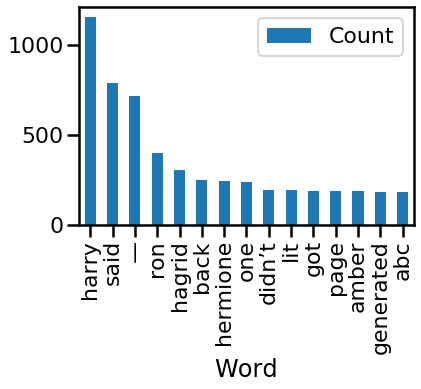

In [52]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Also import STOPWORDS, a set of common English words to remove from our potential words (such as: a, and, but)
from wordcloud import STOPWORDS


# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('data/harry1.txt', encoding="utf8")
a= file.read()
# Stopwords
#stopwords = set(line.strip() for line in open('stopwords.txt'))
#stopwords = stopwords.union(set(['mr','mrs','one','two','said']))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in STOPWORDS:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [53]:
import re
from collections import Counter

with open('data/harry1.txt') as f:
    passage = f.read()

words = re.findall(r'\w+', passage)

cap_words = [word.upper() for word in words]

word_counts = Counter(cap_words)
print(words)
print(cap_words)
print(word_counts)

['Generated', 'by', 'ABC', 'Amber', 'LIT', 'Converter', 'http', 'www', 'processtext', 'com', 'abclit', 'html', 'Harry', 'Potter', 'The', 'Sorcerer', 's', 'Stone', 'byJ', 'K', 'Rowling', 'C', 'H', 'A', 'P', 'T', 'E', 'R', 'O', 'N', 'E', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr', 'and', 'Mrs', 'Dursley', 'of', 'number', 'four', 'Privet', 'Drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', 'thank', 'you', 'very', 'much', 'They', 'were', 'the', 'last', 'people', 'you', 'd', 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', 'because', 'they', 'just', 'didn', 't', 'hold', 'with', 'such', 'nonsense', 'Mr', 'Dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'Grunnings', 'which', 'made', 'drills', 'He', 'was', 'a', 'big', 'beefy', 'man', 'with', 'hardly', 'any', 'neck', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache', 'Mrs', 'Dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'th

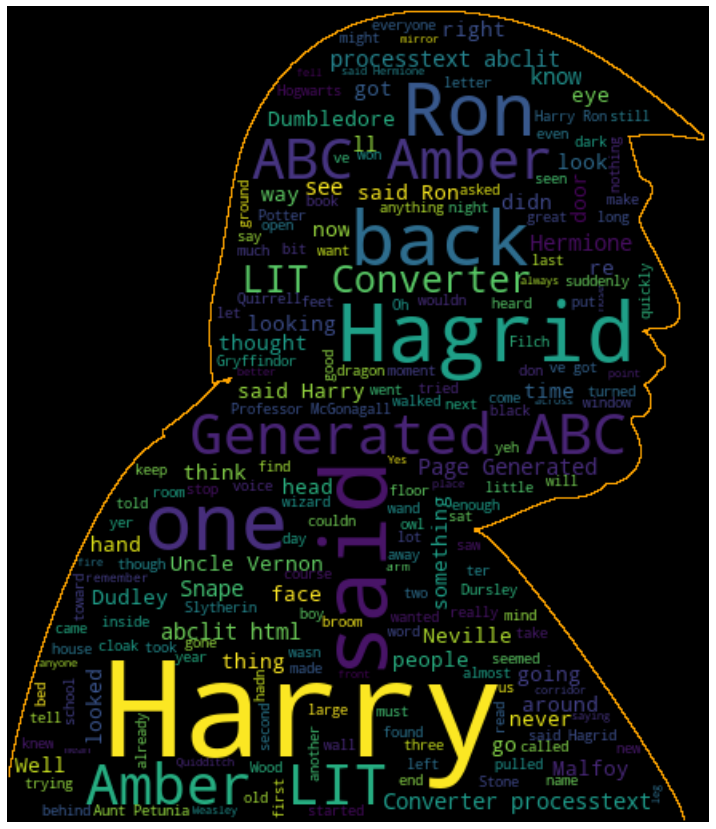

In [54]:
# After converting image to bits, we store as a numpy array
from wordcloud import WordCloud, STOPWORDS
import numpy as np

# For plotting image
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# For importing our image and converting the content into bytes for the Image package
import requests
from io import BytesIO

# To read the image data
from PIL import Image   

# Import Wordcloud
# Also import STOPWORDS, a set of common English words to remove from our potential words (such as: a, and, but)
from wordcloud import WordCloud, STOPWORDS


# Load the image path
url = 'https://www.wpclipart.com/dl.php?img=/American_History/presidents/additional_images/Donald_Trump/Trump_silhouette.png'

# Use requests to get the image data and then uses BytesIO and Image.open() to import the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Create the wave_mask by converting the image data into a numpy array
wave_mask = np.array(img)


# Make the figure
wordcloud = WordCloud(mask=wave_mask, random_state=80, contour_width=1,
                      contour_color='orange').generate(" ".join(words))

# Create matplotlib figure
fig = plt.figure(figsize=(15, 15))

# Display image on our figure
plt.imshow(wordcloud, interpolation="bilinear")

# Turn off axes and set a dark background to avoid a white area saved around the image
plt.axis("off")
plt.style.use('dark_background')
plt.show()


# For saving the image as a png
# Gives each image a version number, so you can re-run and not overwrite
savemode = False

if savemode:
    i = 0
    exists = True
    while(exists):
        i += 1
        exists = os.path.isfile(
            './image1.png'.format(i))

    if not exists:
        fig.savefig('./image2.png'.format(i),
                    bbox_inches='tight')
					

 Implementing the Bag of Words approach

In [55]:
words

['Generated',
 'by',
 'ABC',
 'Amber',
 'LIT',
 'Converter',
 'http',
 'www',
 'processtext',
 'com',
 'abclit',
 'html',
 'Harry',
 'Potter',
 'The',
 'Sorcerer',
 's',
 'Stone',
 'byJ',
 'K',
 'Rowling',
 'C',
 'H',
 'A',
 'P',
 'T',
 'E',
 'R',
 'O',
 'N',
 'E',
 'THE',
 'BOY',
 'WHO',
 'LIVED',
 'Mr',
 'and',
 'Mrs',
 'Dursley',
 'of',
 'number',
 'four',
 'Privet',
 'Drive',
 'were',
 'proud',
 'to',
 'say',
 'that',
 'they',
 'were',
 'perfectly',
 'normal',
 'thank',
 'you',
 'very',
 'much',
 'They',
 'were',
 'the',
 'last',
 'people',
 'you',
 'd',
 'expect',
 'to',
 'be',
 'involved',
 'in',
 'anything',
 'strange',
 'or',
 'mysterious',
 'because',
 'they',
 'just',
 'didn',
 't',
 'hold',
 'with',
 'such',
 'nonsense',
 'Mr',
 'Dursley',
 'was',
 'the',
 'director',
 'of',
 'a',
 'firm',
 'called',
 'Grunnings',
 'which',
 'made',
 'drills',
 'He',
 'was',
 'a',
 'big',
 'beefy',
 'man',
 'with',
 'hardly',
 'any',
 'neck',
 'although',
 'he',
 'did',
 'have',
 'a',
 'very

In [56]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
wordfreq = {}
for sentence in words:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [58]:
wordfreq

{'Generated': 184,
 'by': 321,
 'ABC': 184,
 'Amber': 184,
 'LIT': 184,
 'Converter': 184,
 'http': 184,
 'www': 185,
 'processtext': 184,
 'com': 185,
 'abclit': 184,
 'html': 184,
 'Harry': 1325,
 'Potter': 102,
 'The': 297,
 'Sorcerer': 16,
 's': 1010,
 'Stone': 59,
 'byJ': 1,
 'K': 1,
 'Rowling': 1,
 'C': 20,
 'H': 26,
 'A': 127,
 'P': 26,
 'T': 30,
 'E': 43,
 'R': 21,
 'O': 6,
 'N': 14,
 'THE': 16,
 'BOY': 1,
 'WHO': 1,
 'LIVED': 1,
 'Mr': 80,
 'and': 1810,
 'Mrs': 46,
 'Dursley': 54,
 'of': 1250,
 'number': 15,
 'four': 33,
 'Privet': 16,
 'Drive': 16,
 'were': 304,
 'proud': 7,
 'to': 1851,
 'say': 72,
 'that': 634,
 'they': 508,
 'perfectly': 5,
 'normal': 10,
 'thank': 5,
 'you': 844,
 'very': 161,
 'much': 74,
 'They': 183,
 'the': 3315,
 'last': 84,
 'people': 87,
 'd': 273,
 'expect': 13,
 'be': 361,
 'involved': 5,
 'in': 934,
 'anything': 70,
 'strange': 22,
 'or': 96,
 'mysterious': 5,
 'because': 84,
 'just': 160,
 'didn': 194,
 't': 839,
 'hold': 11,
 'with': 404,
 'su

In [0]:
#Now our most_freq list contains 200 most frequently occurring words along with their frequency of occurrence.
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

In [0]:
sentence_vectors = []
for sentence in words:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [0]:
sentence_vectors = np.asarray(sentence_vectors)

In [62]:
sentence_vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
#we converted our list into a two-dimensional numpy array using asarray function. Now if you open the sentence_vectors variable in the variable explorer of the Spyder editor, you should see the following matrix:
sentence_vectors[411]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Generating Summary for HP Book 1

In [0]:
import spacy
sp = spacy.load('en_core_web_sm')

In [0]:
report_liststr =str(words).strip('[]')

In [67]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [68]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

f = open('data/harry1.txt', 'r')
text_str1 = f.readlines()
f.close()

# using list comprehension 
text_str = ' '.join(map(str, text_str1)) 

def _create_frequency_table(text_string) -> dict:
    """
    we create a dictionary for the word frequency table.
    For this, we should only use the words that are not part of the stopWords array.
    Removing stop words and making frequency table
    Stemmer - an algorithm to bring words to its root word.
    :rtype: dict
    """
    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable


def _score_sentences(sentences, freqTable) -> dict:
    """
    score a sentence by its words
    Basic algorithm: adding the frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        word_count_in_sentence_except_stop_words = 0
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                word_count_in_sentence_except_stop_words += 1
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        if sentence[:10] in sentenceValue:
            sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] / word_count_in_sentence_except_stop_words

        '''
        Notice that a potential issue with our score algorithm is that long sentences will have an advantage over short sentences. 
        To solve this, we're dividing every sentence score by the number of words in the sentence.
        
        Note that here sentence[:10] is the first 10 character of any sentence, this is to save memory while saving keys of
        the dictionary.
        '''

    return sentenceValue


def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = (sumValues / len(sentenceValue))

    return average


def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary


def run_summarization(text):
    # 1 Create the word frequency table
    freq_table = _create_frequency_table(text)

    '''
    We already have a sentence tokenizer, so we just need 
    to run the sent_tokenize() method to create the array of sentences.
    '''

    # 2 Tokenize the sentences
    sentences = sent_tokenize(text)

    # 3 Important Algorithm: score the sentences
    sentence_scores = _score_sentences(sentences, freq_table)

    # 4 Find the threshold
    threshold = _find_average_score(sentence_scores)

    # 5 Important Algorithm: Generate the summary
    summary = _generate_summary(sentences, sentence_scores, 1.3 * threshold)

    return summary


if __name__ == '__main__':
    result = run_summarization(text_str)
    print(result)

 They were the last people you’d expect to be involved in anything strange
 or mysterious, because they just didn’t hold with such nonsense. “Little tyke,” chortled Mr. Dursley as he left the house. He was in a very good mood until lunchtime, when he thought
 he’d stretch his legs and walk across the road to buy himself a bun from the bakery. He looked back at the whisperers as if he wanted to
 say something to them, but thought better of it. He dashed back across the road, hurried up to his office, snapped at his secretary not to disturb him,
 seized his telephone, and had almost finished dialing his home number when he changed his mind. Or Harold. He was rattled. “Shoo!” said Mr. Dursley loudly. The cat didn’t move. Trying to pull himself together, he let himself into the house. “Most mysterious. And now, over to Jim McGuffin with the weather. It was no good. He’d have to say
 something to her. “No,” she said sharply. “Why?”
 “Funny stuff on the news,” Mr. Dursley mumbled. Howard, is

WORD2VEC and Similarity Match

Goal is to create word vectors from a game of thrones dataset and analyze them to see semantic similarity.


# Step 0: Importing the dependencies:

In [0]:
from __future__ import absolute_import, division, print_function
#future is the missing compatibility layer between python 2 and 3. 

In [0]:
import codecs 
import glob
import logging  
import multiprocessing 
import os 
import pprint #pretty print, human readable
import re #regular expressions

In [0]:
import nltk 
import gensim.models.word2vec as w2v #word 2 vec
import sklearn.manifold #dimensionality reduction #the vectors are going to be multidimensional
import numpy as np #math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [72]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
#set up logging:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [74]:
#nltk tokenize the sentences: exm:
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize, pos_tag

sentence = ''''At eight oclock on Thursday morning Arthur didn't feel very good'''

tokens = nltk.word_tokenize(sentence)

tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["'At",
 'eight',
 'oclock',
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good']

# Step 1: Process data

In [75]:
nltk.download("punkt") #pretrained tokenizer
nltk.download("stopwords") # words like, and, the an, a, of
#we want to remove those words so the vectors we create are more accurate

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Combine the books into one string:
We need to do this because we want to have one corpus for all of these books

In [76]:
book_filenames = sorted(glob.glob("data/*.txt"))

print("Found books:")
book_filenames

Found books:


['data/harry1.txt',
 'data/harry2.txt',
 'data/harry3.txt',
 'data/harry4.txt',
 'data/harry5.txt',
 'data/harry6.txt',
 'data/harry7.txt']

In [77]:
#initialize a raw corpus, we'll add all text to this file
corpus_raw = u'' #we start with u, because it's a unicode, and we want to convert into utf-8
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("corpus is now {0} characters long".format(len(corpus_raw)))
    print()
    

Reading 'data/harry1.txt'...
corpus is now 452403 characters long

Reading 'data/harry2.txt'...
corpus is now 958746 characters long

Reading 'data/harry3.txt'...
corpus is now 1602775 characters long

Reading 'data/harry4.txt'...
corpus is now 2732465 characters long

Reading 'data/harry5.txt'...
corpus is now 4277047 characters long

Reading 'data/harry6.txt'...
corpus is now 5317594 characters long

Reading 'data/harry7.txt'...
corpus is now 6489478 characters long



### Split the corpus into sentences:

In [0]:
#load the trained model
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [0]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [0]:
#convert into list of words
#remove unnecessary characters, split into words

def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]", " ", raw)
    words = clean.split()
    return words
#"[^a-zA-Z]": match all the stings that contain a non-letter
#"^[a-zA-Z]": means match all the strings with a letter

In [0]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [82]:
print(raw_sentences[5])

Mrs. Dursley was thin and blonde and
had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time
craning over garden fences, spying on the neighbors.


In [83]:
print(sentence_to_wordlist(raw_sentences[5]))

['Mrs', 'Dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck', 'which', 'came', 'in', 'very', 'useful', 'as', 'she', 'spent', 'so', 'much', 'of', 'her', 'time', 'craning', 'over', 'garden', 'fences', 'spying', 'on', 'the', 'neighbors']


In [84]:
sentences[5]

['Mrs',
 'Dursley',
 'was',
 'thin',
 'and',
 'blonde',
 'and',
 'had',
 'nearly',
 'twice',
 'the',
 'usual',
 'amount',
 'of',
 'neck',
 'which',
 'came',
 'in',
 'very',
 'useful',
 'as',
 'she',
 'spent',
 'so',
 'much',
 'of',
 'her',
 'time',
 'craning',
 'over',
 'garden',
 'fences',
 'spying',
 'on',
 'the',
 'neighbors']

In [90]:
#count tokens, each one being a sentence
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,161,827 tokens


# Step 2: Build the model:

In [0]:
num_features = 300 #dimensionality of the resulting word vectors
min_word_count = 3
num_workers = multiprocessing.cpu_count()# number of threads to run in parallel
context_size = 7
downsampling = 1e-3 #downsamle setting for frequent words = how often to use
seed = 1

In [0]:
harry2vec = w2v.Word2Vec(sg=1,
                          seed=seed,
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count, 
                          window=context_size, 
                          sample=downsampling)


In [93]:
harry2vec.build_vocab(sentences) # the new words in `sentences` will be added to model's vocab.

2019-12-11 20:25:33,263 : INFO : collecting all words and their counts
2019-12-11 20:25:33,266 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-11 20:25:33,315 : INFO : PROGRESS: at sentence #10000, processed 174292 words, keeping 10260 word types
2019-12-11 20:25:33,355 : INFO : PROGRESS: at sentence #20000, processed 339141 words, keeping 14573 word types
2019-12-11 20:25:33,389 : INFO : PROGRESS: at sentence #30000, processed 485783 words, keeping 17221 word types
2019-12-11 20:25:33,424 : INFO : PROGRESS: at sentence #40000, processed 609865 words, keeping 19765 word types
2019-12-11 20:25:33,456 : INFO : PROGRESS: at sentence #50000, processed 728012 words, keeping 21707 word types
2019-12-11 20:25:33,493 : INFO : PROGRESS: at sentence #60000, processed 863166 words, keeping 23705 word types
2019-12-11 20:25:33,530 : INFO : PROGRESS: at sentence #70000, processed 1009047 words, keeping 25547 word types
2019-12-11 20:25:33,568 : INFO : collected 27

In [94]:
print("Word2Vec vocabulary length:", len(harry2vec.wv.vocab))

Word2Vec vocabulary length: 13364


# Step 3: start training:

In [95]:
harry2vec.train(sentences, total_words=token_count, epochs=100)

2019-12-11 20:25:41,016 : INFO : training model with 2 workers on 13364 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2019-12-11 20:25:42,059 : INFO : EPOCH 1 - PROGRESS: at 9.45% words, 82893 words/s, in_qsize 3, out_qsize 0
2019-12-11 20:25:43,076 : INFO : EPOCH 1 - PROGRESS: at 20.62% words, 90470 words/s, in_qsize 3, out_qsize 0
2019-12-11 20:25:44,135 : INFO : EPOCH 1 - PROGRESS: at 31.79% words, 91775 words/s, in_qsize 3, out_qsize 0
2019-12-11 20:25:45,209 : INFO : EPOCH 1 - PROGRESS: at 43.83% words, 93877 words/s, in_qsize 3, out_qsize 0
2019-12-11 20:25:46,296 : INFO : EPOCH 1 - PROGRESS: at 55.86% words, 94929 words/s, in_qsize 3, out_qsize 0
2019-12-11 20:25:47,372 : INFO : EPOCH 1 - PROGRESS: at 67.90% words, 95671 words/s, in_qsize 3, out_qsize 0
2019-12-11 20:25:48,463 : INFO : EPOCH 1 - PROGRESS: at 79.92% words, 96053 words/s, in_qsize 3, out_qsize 0
2019-12-11 20:25:49,525 : INFO : EPOCH 1 - PROGRESS: at 91.09% words, 95684 words/s, in_

(89079794, 116182700)

In [0]:
#save file
if not os.path.exists("trained"):
    os.makedirs("trained")

In [99]:
harry2vec.save(os.path.join("trained", "harry2vec.w2v"))

2019-12-11 20:41:35,917 : INFO : saving Word2Vec object under trained/harry2vec.w2v, separately None
2019-12-11 20:41:35,920 : INFO : not storing attribute vectors_norm
2019-12-11 20:41:35,921 : INFO : not storing attribute cum_table
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-12-11 20:41:36,290 : INFO : saved trained/harry2vec.w2v


In [100]:
#load model
harry2vec = w2v.Word2Vec.load(os.path.join("trained", "harry2vec.w2v"))

2019-12-11 20:41:38,023 : INFO : loading Word2Vec object from trained/harry2vec.w2v
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-12-11 20:41:38,297 : INFO : loading wv recursively from trained/harry2vec.w2v.wv.* with mmap=None
2019-12-11 20:41:38,304 : INFO : setting ignored attribute vectors_norm to None
2019-12-11 20:41:38,309 : INFO : loading vocabulary recursively from trained/harry2vec.w2v.vocabulary.* with mmap=None
2019-12-11 20:41:38,313 : INFO : loading trainables recursively from trained/harry2vec.w2v.trainables.* with mmap=None
2019-12-11 20:41:38,314 : INFO : setting ignored attribute cum_table to None
2019-12-11 20:41:38,317 : INFO : loaded trained/harry2vec.w2v


In [0]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [102]:
all_word_vectors_matrix = harry2vec.wv.syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [0]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [0]:
#plot the big picture
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[harry2vec.wv.vocab[word].index])
            for word in harry2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [105]:
points.head(10)

,word,x,y
0,Generated,-6.354628,-6.673641
1,by,0.031902,-0.358720
2,ABC,-6.359222,-6.676364
3,Amber,-6.361570,-6.677224
4,LIT,-6.358139,-6.670617
5,Converter,-6.272999,-6.548435
6,http,-3.178338,-3.142580
7,www,-3.048465,-3.019465
8,processtext,-2.962005,-2.931081
9,com,-2.849060,-2.783184


In [0]:
sns.set_context("poster")

In [0]:

def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

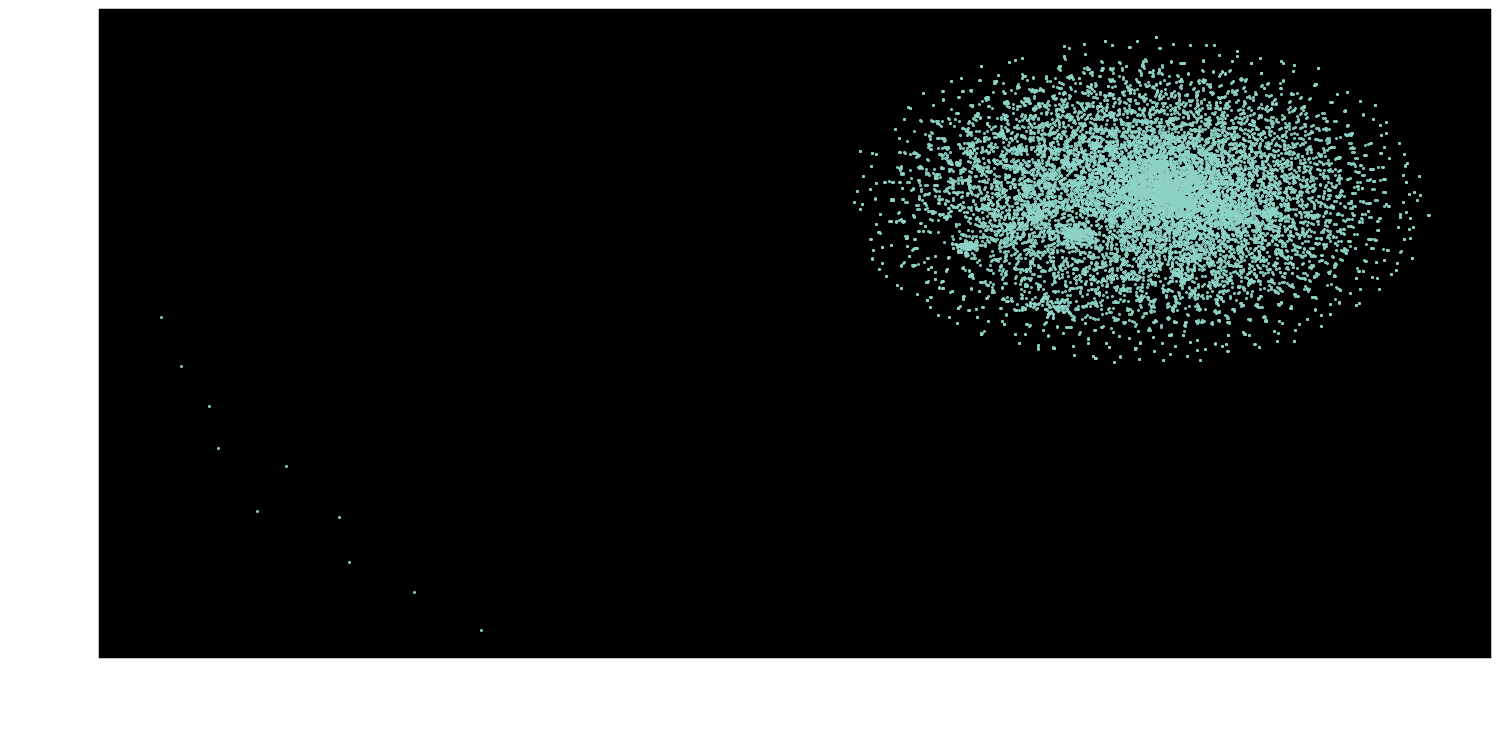

In [107]:
points.plot.scatter(1 ,2, s=1, figsize=(25, 12))

In [108]:
print("Range of t-sne viz in x = {}, {} and y = {}, {}" .format(min(points.x), max(points.x), min(points.y), max(points.y)))

Range of t-sne viz in x = -34.598594665527344, 10.3138427734375 and y = -26.609806060791016, 10.12463665008545


### Semantic similarities

In [109]:
harry2vec.most_similar("Dumbledore")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-12-11 20:49:20,330 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Albus', 0.3445565402507782),
 ('perately', 0.33362486958503723),
 ('Lupin', 0.33131295442581177),
 ('unimportant', 0.32751333713531494),
 ('Pensieve', 0.3223308324813843),
 ('headmaster', 0.3218582272529602),
 ('des', 0.31587809324264526),
 ('he', 0.3138991594314575),
 ('Firenze', 0.29834428429603577),
 ('generosity', 0.2979622483253479)]

In [110]:
harry2vec.most_similar("Sirius")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Black', 0.45218753814697266),
 ('godfather', 0.3350067436695099),
 ('parents', 0.31671983003616333),
 ('James', 0.3147602677345276),
 ('Lupin', 0.29853612184524536),
 ('deranged', 0.2981463074684143),
 ('Karkaroff', 0.28955453634262085),
 ('Young', 0.2804765999317169),
 ('Ron', 0.27368903160095215),
 ('he', 0.27216827869415283)]

In [111]:
harry2vec.most_similar("Voldemort")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Lord', 0.5835099816322327),
 ('wrath', 0.344457745552063),
 ('vibrated', 0.32251685857772827),
 ('he', 0.3223792612552643),
 ('uncoiling', 0.3220246434211731),
 ('snake', 0.32064324617385864),
 ('Killing', 0.3173062801361084),
 ('lipless', 0.3158528804779053),
 ('Voldemorts', 0.3123278021812439),
 ('ambitions', 0.3088899850845337)]

In [112]:
harry2vec.most_similar("Umbridge")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Dolores', 0.4464333653450012),
 ('clipboard', 0.36403676867485046),
 ('Professor', 0.3504714369773865),
 ('UMBRIDGE', 0.3310140371322632),
 ('office', 0.31064504384994507),
 ('shouldering', 0.304192453622818),
 ('Trelawney', 0.3037707805633545),
 ('McGonagall', 0.29465237259864807),
 ('Jane', 0.29122233390808105),
 ('continual', 0.2898354232311249)]

In [0]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = harry2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [114]:
nearest_similarity_cosmul("Harry", "Dumbledore", "Snape") 
nearest_similarity_cosmul("Hermione", "Weasley", "Malfoy") 
nearest_similarity_cosmul("Nagini", "Voldemort", "Dobby") 


Harry is related to Dumbledore, as he is related to Snape
Hermione is related to Weasley, as Draco is related to Malfoy
Nagini is related to Voldemort, as sir is related to Dobby


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'sir'

In [116]:
harry2vec.wv.doesnt_match("Harry Dumbledore Peter".split())  

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'Peter'

In [177]:
harry2vec.wv.doesnt_match("Dumbledore Snape Ginny Harry".split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'Ginny'

In [117]:
 harry2vec.wv.doesnt_match("Hagrid Harry Longbottom Quirrell ".split())  

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'Longbottom'